__Students:__ Andrea Ceriati, Kathryn Lesh, Emily Sims, Scott Zuckerbrow

__Instructor:__ Daniel Pulido-Mendez

__Course:__ Data Analytics Boot Camp

__Assignment:__ Project 4

__Date:__ 04/22/2024

## Table of Contents

[**Importing Libraries**](#IL)

1. [**Data Cleaning & Wrangling**](#DWrang)

    1.1 [**Checking and Correcting Data Format**](#Dform)

    1.2 [**Handling Missing Data**](#MissD)

2. [**Exploratory Data Analysis**](#EDA)

3. [**Model Development**](#MDev)

4. [**Conclusions**](#Concl)

## Importing Libraries <a name="IL"></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

2024-04-16 19:17:43.108347: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 1. Data Cleaning & Wrangling <a name="DWrang"></a>

In [2]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

#  Import and read the "Shark Tank US dataset.csv".
sharktank_df = pd.read_csv("Shark Tank US dataset.csv")
sharktank_df.head()

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Company Website,Pitchers Gender,Pitchers City,Pitchers State,Pitchers Average Age,Entrepreneur Names,Multiple Entrepreneurs,US Viewership,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Royalty Deal,Advisory Shares Equity,Loan,Deal Has Conditions,Barbara Corcoran Investment Amount,Barbara Corcoran Investment Equity,Mark Cuban Investment Amount,Mark Cuban Investment Equity,Lori Greiner Investment Amount,Lori Greiner Investment Equity,Robert Herjavec Investment Amount,Robert Herjavec Investment Equity,Daymond John Investment Amount,Daymond John Investment Equity,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Guest Name,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Guest Present
0,1,AvaTheElephant,1,1,9-Aug-09,5-Feb-10,9-Aug-09,Health/Wellness,Ava The Elephant - Baby and Child Care,http://www.avatheelephant.com/,Female,Atlanta,GA,NaN,Tiffany Krumins,0.0,4.15,50000,15.0,333333,1,50000.0,55.0,90909.0,1.0,50000.0,55.0,NaN,NaN,NaN,NaN,50000.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN
1,1,Mr.Tod'sPieFactory,1,2,9-Aug-09,5-Feb-10,9-Aug-09,Food and Beverage,Mr. Tod's Pie Factory - Specialty Food,http://whybake.com/,Male,Somerset,NJ,NaN,Tod Wilson,0.0,4.15,460000,10.0,4600000,1,460000.0,50.0,920000.0,2.0,230000.0,25.0,NaN,NaN,NaN,NaN,230000.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,230000.0,25.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN
2,1,Wispots,1,3,9-Aug-09,5-Feb-10,9-Aug-09,Business Services,Wispots - Consumer Services,http://www.wispots.com/,Male,Cary,NC,NaN,Kevin Flannery,0.0,4.15,1200000,10.0,12000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN
3,1,CollegeFoxesPackingBoxes,1,4,9-Aug-09,5-Feb-10,9-Aug-09,Lifestyle/Home,College Foxes Packing Boxes - Consumer Services,http://collegehunkshaulingjunk.com/,Male,Tampa,FL,NaN,"Nick Friedman, Omar Soliman",0.0,4.15,250000,25.0,1000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN
4,1,IonicEar,1,5,9-Aug-09,5-Feb-10,9-Aug-09,Software/Tech,Ionic Ear - Novelties,NaN,Male,St. Paul,MN,NaN,Darrin Johnson,0.0,4.15,1000000,15.0,6666667,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,NaN


In [3]:
# Determine the size of the dataframe
print("The sharktank_df dataframe has {} rows and {} columns."\
      .format(sharktank_df.shape[0], sharktank_df.shape[1]))

The sharktank_df dataframe has 1345 rows and 53 columns.


In [4]:
## Determine the number of unique values in each column.
#sharktank_df.nunique()

1.1 Checking and correcting data format

In [5]:
# Determine columns datatype
sharktank_df.dtypes

Season Number                           int64
Startup Name                           object
Episode Number                          int64
Pitch Number                            int64
Season Start                           object
Season End                             object
Original Air Date                      object
Industry                               object
Business Description                   object
Company Website                        object
Pitchers Gender                        object
Pitchers City                          object
Pitchers State                         object
Pitchers Average Age                   object
Entrepreneur Names                     object
Multiple Entrepreneurs                float64
US Viewership                         float64
Original Ask Amount                     int64
Original Offered Equity               float64
Valuation Requested                     int64
Got Deal                                int64
Total Deal Amount                 

In [6]:
# Convert "Season Start", "Season End", "Original Air Date" columns to datetime
# Specify the format of the dates
date_format = '%d-%b-%y'
sharktank_df['Season Start'] = pd.to_datetime(sharktank_df['Season Start'], format=date_format)
sharktank_df['Season End'] = pd.to_datetime(sharktank_df['Season End'], format=date_format)
sharktank_df['Original Air Date'] = pd.to_datetime(sharktank_df['Original Air Date'], format=date_format)

1.2 Handling Missing Data

In [7]:
# Determine the number of missing values in each column
missing_data = sharktank_df.isnull()
for column in missing_data.columns:
    print(column)
    for value, count in missing_data[column].value_counts().items():
        print(f"{value}: {count}")
    print("")
    
# True = missing, False = not missing

Season Number
False: 1345

Startup Name
False: 1345

Episode Number
False: 1345

Pitch Number
False: 1345

Season Start
False: 1345

Season End
False: 1274
True: 71

Original Air Date
False: 1345

Industry
False: 1345

Business Description
False: 1345

Company Website
True: 758
False: 587

Pitchers Gender
False: 1338
True: 7

Pitchers City
True: 819
False: 526

Pitchers State
False: 789
True: 556

Pitchers Average Age
True: 936
False: 409

Entrepreneur Names
False: 850
True: 495

Multiple Entrepreneurs
False: 918
True: 427

US Viewership
False: 1341
True: 4

Original Ask Amount
False: 1345

Original Offered Equity
False: 1345

Valuation Requested
False: 1345

Got Deal
False: 1345

Total Deal Amount
False: 814
True: 531

Total Deal Equity
False: 814
True: 531

Deal Valuation
False: 814
True: 531

Number of Sharks in Deal
False: 814
True: 531

Investment Amount Per Shark
False: 814
True: 531

Equity Per Shark
False: 814
True: 531

Royalty Deal
True: 1265
False: 80

Advisory Shares Equity

In [8]:
# Determine the rows with missing values in "Season End", and also include "Season Number" and "Season Start" to gain further insights
dfN=sharktank_df[['Season Number', 'Season Start','Season End']] # defines a new dataframe
dfN[dfN.isnull().any(axis=1)] # checks which rows in the new dataframe contains missing values

,Season Number,Season Start,Season End
1274,15,2023-09-29,NaT
1275,15,2023-09-29,NaT
1276,15,2023-09-29,NaT
1277,15,2023-09-29,NaT
1278,15,2023-09-29,NaT
...,...,...,...
1340,15,2023-09-29,NaT
1341,15,2023-09-29,NaT
1342,15,2023-09-29,NaT
1343,15,2023-09-29,NaT


In [9]:
# Replace missing values in the "Season End" column with the actual date when the season is going to end
sharktank_df['Season End'].replace(np.nan, '3-5-2024', inplace=True)

In [10]:
## Check that the date was added
#sharktank_df.loc[[1342,1343,1344],:]

NOTE: Should we leave the company website name with missing values?

In [11]:
# The company website has 587 missing values, replace data with binary data (0 has a website / 1 it does not have a website)
sharktank_df['Company Website'] = sharktank_df['Company Website'].notna().astype(int)

In [12]:
# Determine the rows with missing values in Pitchers Gender
dfN1=sharktank_df[['Pitchers Gender']] # defines a new dataframe
dfN1[dfN1.isnull().any(axis=1)] # checks which rows in the new dataframe contain missing values

,Pitchers Gender
994,NaN
998,NaN
1000,NaN
1004,NaN
1070,NaN
1099,NaN
1121,NaN


In [13]:
# Determine the missing value gathering information from other columns such as Startup Name and Entrepreneur Names
sharktank_df.iloc[[994, 998, 1000, 1004, 1070, 1099, 1121]]

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Company Website,Pitchers Gender,Pitchers City,Pitchers State,Pitchers Average Age,Entrepreneur Names,Multiple Entrepreneurs,US Viewership,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Royalty Deal,Advisory Shares Equity,Loan,Deal Has Conditions,Barbara Corcoran Investment Amount,Barbara Corcoran Investment Equity,Mark Cuban Investment Amount,Mark Cuban Investment Equity,Lori Greiner Investment Amount,Lori Greiner Investment Equity,Robert Herjavec Investment Amount,Robert Herjavec Investment Equity,Daymond John Investment Amount,Daymond John Investment Equity,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Guest Name,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Guest Present
994,12,Rumpl,1,995,2020-10-16,2021-05-21,2020-10-16,Lifestyle/Home,high performance blankets,1,NaN,Portland,OR,NaN,Wylie Robinson,0.0,4.03,600000,4.0,15000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,12,PNuffCrunch,2,999,2020-10-16,2021-05-21,2020-10-23,Food and Beverage,"non-gmo, plant-based, puffed peanut snack",1,NaN,NaN,NaN,NaN,Juan Salinas,0.0,3.90,300000,10.0,3000000,1,400000.0,25.0,1600000.0,1.0,400000.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,400000.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,12,AnimatedLure,3,1001,2020-10-16,2021-05-21,2020-10-30,Lifestyle/Home,Rechargeable robotic lure,0,NaN,NaN,NaN,NaN,Sobhan Kanaee and Kanz Kayfan,1.0,4.42,325000,10.0,3250000,1,325000.0,10.0,3250000.0,1.0,325000.0,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325000.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,12,SurpriseCake,4,1005,2020-10-16,2021-05-21,2020-11-06,Food and Beverage,Surprise gifts inside of a cake,1,NaN,NaN,NaN,NaN,Jordan Long and Liz Charm,1.0,2.31,200000,8.0,2500000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1070,12,FurZapper,20,1071,2020-10-16,2021-05-21,2021-04-09,Pet Products,product that helps remove pet hair from clothes,0,NaN,Ocean County,NJ,Middle,Harry Levin and Michael Sweigar,1.0,4.31,600000,10.0,6000000,1,600000.0,15.0,4000000.0,1.0,600000.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600000.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1099,13,Sparketh,3,1100,2021-10-08,2022-05-20,2021-10-22,Children/Education,Online art education for kids and teens,0,NaN,NaN,NaN,NaN,Dwayne Walker and Tim Samuel,1.0,3.55,100000,8.0,1250000,1,100000.0,20.0,500000.0,2.0,50000.0,10.0,NaN,NaN,NaN,NaN,50000.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.0,10.0,Daniel Lubetzky,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1121,13,TheRealElf,8,1122,2021-10-08,2022-05-20,2021-12-10,Lifestyle/Home,personal digital messages,0,NaN,NaN,NaN,Young,Tommy Holl,0.0,3.57,125000,25.0,500000,1,125000.0,35.0,357143.0,1.0,125000.0,35.0,NaN,NaN,75000.0,NaN,125000.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Replace missing values in gender column after having conducted a brief research on the pitchers gender
sharktank_df.loc[994, 'Pitchers Gender'] = 'Male'
sharktank_df.loc[998, 'Pitchers Gender'] = 'Male'
sharktank_df.loc[1000, 'Pitchers Gender'] = 'Male'
sharktank_df.loc[1004, 'Pitchers Gender'] = 'Mixed Team'
sharktank_df.loc[1070, 'Pitchers Gender'] = 'Male'
sharktank_df.loc[1099, 'Pitchers Gender'] = 'Male'
sharktank_df.loc[1121, 'Pitchers Gender'] = 'Male'

NOTE: Should we leave the columns 'Pitchers City', 'Pitchers State', 'Pitchers Average Age', 'Entrepreneur Names' with missing values?

In [15]:
# Drop Pitchers City, Pitchers State, and Pitchers Average Age due to more than one-third of the values being missing for each column
sharktank_df.drop(columns=['Pitchers City', 'Pitchers State', 'Pitchers Average Age', 'Entrepreneur Names'], inplace=True)

In [16]:
# Revisit Pitchers Average Age at a later time

In [17]:
# Multiple Entrepreneurs column has a lot of missing values
# Replace values in column 'Multiple Entrepreneurs' where the corresponding value in column 'Pitchers Gender' is 'Mixed Team'.
sharktank_df.loc[sharktank_df['Pitchers Gender'] == 'Mixed Team', 'Multiple Entrepreneurs'] = 1

NOTE: 354 values missing in 'Multiple Entrepreneurs' column. Drop it?

In [18]:
# Drop Multiple Entrepreneurs due to more than one-quarter of the values being missing for each column
sharktank_df.drop(columns=['Multiple Entrepreneurs'], inplace=True)

In [19]:
# Determine the rows with missing values in "US Viewership"
dfN2=sharktank_df[['US Viewership']] # defines a new dataframe
dfN2[dfN2.isnull().any(axis=1)] # checks which rows in the new dataframe contains missing values

,US Viewership
1341,NaN
1342,NaN
1343,NaN
1344,NaN


In [20]:
# Viewership has missing values for last four episodes, check what was the viewership for the episodes before the last four.
sharktank_df.tail(10)

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Company Website,Pitchers Gender,US Viewership,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Royalty Deal,Advisory Shares Equity,Loan,Deal Has Conditions,Barbara Corcoran Investment Amount,Barbara Corcoran Investment Equity,Mark Cuban Investment Amount,Mark Cuban Investment Equity,Lori Greiner Investment Amount,Lori Greiner Investment Equity,Robert Herjavec Investment Amount,Robert Herjavec Investment Equity,Daymond John Investment Amount,Daymond John Investment Equity,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Guest Name,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Guest Present
1335,15,FunkyMello,16,1335,2023-09-29,2024-03-05,2024-03-01,Food and Beverage,Marshmallow creme,1,Mixed Team,3.13,50000,15.0,333333,1,50000.0,15.0,333333.0,1.0,50000.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0
1336,15,DaVinciEyeApp,16,1336,2023-09-29,2024-03-05,2024-03-01,Software/Tech,App for artists,1,Male,3.13,350000,5.0,7000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0
1337,15,Boona,17,1337,2023-09-29,2024-03-05,2024-03-08,Lifestyle/Home,Tandem Showerhead,1,Male,3.13,400000,10.0,4000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN
1338,15,LetThemEatCandles,17,1338,2023-09-29,2024-03-05,2024-03-08,Lifestyle/Home,Edible birthday candles,1,Mixed Team,3.13,250000,10.0,2500000,1,250000.0,18.0,1388889.0,1.0,250000.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250000.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN
1339,15,ChefeeRobotics,17,1339,2023-09-29,2024-03-05,2024-03-08,Electronics,Robotic chef,1,Male,3.13,500000,4.0,12500000,1,500000.0,15.0,3333333.0,1.0,500000.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500000.0,15.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN
1340,15,LadyAlpha,17,1340,2023-09-29,2024-03-05,2024-03-08,Lifestyle/Home,Nursing cover,1,Mixed Team,3.13,100000,10.0,1000000,1,100000.0,10.0,1000000.0,1.0,100000.0,10.0,NaN,NaN,NaN,NaN,100000.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN
1341,15,NowhereBakery,18,1341,2023-09-29,2024-03-05,2024-03-15,Food and Beverage,Healthy bakery,1,Mixed Team,NaN,200000,10.0,2000000,1,100000.0,12.5,800000.0,1.0,100000.0,12.5,NaN,NaN,100000.0,NaN,100000.0,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0
1342,15,TheMurderMysteryCo,18,1342,2023-09-29,2024-03-05,2024-03-15,Uncertain/Other,Murder mystery parties,1,Male,NaN,350000,5.0,7000000,1,350000.0,10.0,3500000.0,1.0,350000.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350000.0,10.0,Jason Blum,1.0,1.0,1.0,NaN,NaN,1.0,1.0
1343,15,Overplay,18,1343,2023-09-29,2024-03-05,2024-03-15,Software/Tech,App for video game creation,1,Mixed Team,NaN,500000,2.5,20000000,1,500000.0,4.0,12500000.0,1.0,500000.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,500000.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0
1344,15,Nourish+Bloom,18,1344,2023-09-29,2024-03-05,2024-03-15,Lifestyle/Home,Autonomous grocery store,1,Mixed Team,NaN,400000,5.0,8000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0


In [21]:
# Assume that the viewership will remain constant for the last four episodes, replace missing value with 3.13
sharktank_df['US Viewership'].replace(np.nan, 3.13, inplace=True)

In [22]:
# Replace the missing values for the columns below with 0
sharktank_df[['Total Deal Amount', 'Total Deal Equity', 'Deal Valuation', 'Number of Sharks in Deal', 'Investment Amount Per Shark', 'Equity Per Shark', 'Royalty Deal', 'Loan']] = \
    sharktank_df[['Total Deal Amount', 'Total Deal Equity', 'Deal Valuation', 'Number of Sharks in Deal', 'Investment Amount Per Shark', 'Equity Per Shark', 'Royalty Deal', 'Loan']].fillna(0)

NOTE: Drop Loan column? Has just 55 non null values. 'Advisory Shares Equity' and 'Deal Has Conditions' have just 1 value each.

In [23]:
# Drop Pitchers City, Pitchers State, and Pitchers Average Age due to more than one-third of the values being missing for each column
sharktank_df.drop(columns=['Advisory Shares Equity', 'Loan', 'Deal Has Conditions'], inplace=True)

In [24]:
def fill_present_columns(df, present_column, investment_column):
    # Replace missing values in 'present_column' with 1 where 'investment_column' is not missing
    df.loc[~df[investment_column].isna(), present_column] = 1

    # Identify rows where 'present_column' is 1
    guest_present_rows = df[df[present_column] == 1]

    # Replace missing values with 1 in the 'present_column' for the selected 'Season Number' and 'Episode Number'
    for index, row in guest_present_rows.iterrows():
        season_number = row['Season Number']
        episode_number = row['Episode Number']
        df.loc[(df['Season Number'] == season_number) & 
               (df['Episode Number'] == episode_number) &
               (df[present_column].isna()), present_column] = 1

In [25]:
# Call the function for Guests
fill_present_columns(sharktank_df, 'Guest Present', 'Guest Investment Amount')

In [26]:
# Assumption: if a guest did not make at least one deal in one episode he was not considered present in that episode
# Replace the missing values for the columns below with 0
sharktank_df[['Guest Investment Amount', 'Guest Investment Equity', 'Guest Present']] = \
    sharktank_df[['Guest Investment Amount', 'Guest Investment Equity', 'Guest Present']].fillna(0)

sharktank_df['Guest Name'].replace(np.nan, "NA", inplace=True)

In [27]:
# Replace missing values in gender column after having conducted a brief research on the pitchers gender
sharktank_df.loc[994, 'Pitchers Gender'] = 'Male'

In [28]:
# # Drop if shark was present or not due to one-quarter of the data being missing value in each column
# sharktank_df.drop(columns=['Barbara Corcoran Present', 'Mark Cuban Present', 'Lori Greiner Present', 'Robert Herjavec Present', 'Daymond John Present', 'Kevin O Leary Present'], inplace=True)

In [29]:
# Assumption: if a investor did not make at least one deal in one episode he was not considered present that episodes (for episode in which we do not have data)
# Call the function defined above for Barbara Corcoran, Mark Cuban, Lori Greiner, Robert Herjavec, Daymond John, Kevin O Leary
fill_present_columns(sharktank_df, 'Barbara Corcoran Present', 'Barbara Corcoran Investment Amount')
fill_present_columns(sharktank_df, 'Mark Cuban Present', 'Mark Cuban Investment Amount')
fill_present_columns(sharktank_df, 'Lori Greiner Present', 'Lori Greiner Investment Amount')
fill_present_columns(sharktank_df, 'Robert Herjavec Present', 'Robert Herjavec Investment Amount')
fill_present_columns(sharktank_df, 'Daymond John Present', 'Daymond John Investment Amount')
fill_present_columns(sharktank_df, 'Kevin O Leary Present', 'Kevin O Leary Investment Amount')

In [30]:
# Replace the missing values for the columns below with 0
sharktank_df[['Barbara Corcoran Investment Amount', 'Barbara Corcoran Investment Equity', 'Mark Cuban Investment Amount', 'Mark Cuban Investment Equity', 'Lori Greiner Investment Amount',
              'Lori Greiner Investment Equity', 'Robert Herjavec Investment Amount', 'Robert Herjavec Investment Equity', 'Daymond John Investment Amount', 'Daymond John Investment Equity',
              'Kevin O Leary Investment Amount', 'Kevin O Leary Investment Equity', 'Barbara Corcoran Present', 'Mark Cuban Present', 'Lori Greiner Present', 'Robert Herjavec Present', 
              'Daymond John Present', 'Kevin O Leary Present']] = \
    sharktank_df[['Barbara Corcoran Investment Amount', 'Barbara Corcoran Investment Equity', 'Mark Cuban Investment Amount', 'Mark Cuban Investment Equity', 'Lori Greiner Investment Amount',
                  'Lori Greiner Investment Equity', 'Robert Herjavec Investment Amount', 'Robert Herjavec Investment Equity', 'Daymond John Investment Amount', 'Daymond John Investment Equity',
                  'Kevin O Leary Investment Amount', 'Kevin O Leary Investment Equity', 'Barbara Corcoran Present', 'Mark Cuban Present', 'Lori Greiner Present', 'Robert Herjavec Present', 
                  'Daymond John Present', 'Kevin O Leary Present']].fillna(0)

In [31]:
# Replace the missing values for the columns below with 0
sharktank_df[['Barbara Corcoran Present', 'Mark Cuban Present', 'Lori Greiner Present', 'Robert Herjavec Present', 'Daymond John Present', 'Kevin O Leary Present']] = \
    sharktank_df[['Barbara Corcoran Present', 'Mark Cuban Present', 'Lori Greiner Present', 'Robert Herjavec Present', 'Daymond John Present', 'Kevin O Leary Present']].fillna(0)

In [32]:
# Replace values in row 6 columns 'Mark Cuban Investment Amount', 'Mark Cuban Investment Equity', 'Mark Cuban Present' with 0 after confirming that MArc Cuban was not a shark in Shark Tank season 1 episode 2
sharktank_df.loc[6, ['Mark Cuban Investment Amount', 'Mark Cuban Investment Equity', 'Mark Cuban Present']] = 0

In [33]:
# Create new columns indicating whether each investor made a deal
sharktank_df['Barbara Corcoran Got Deal'] = (sharktank_df['Barbara Corcoran Investment Amount'] != 0).astype(int)
sharktank_df['Mark Cuban Got Deal'] = (sharktank_df['Mark Cuban Investment Amount'] != 0).astype(int)
sharktank_df['Lori Greiner Got Deal'] = (sharktank_df['Lori Greiner Investment Amount'] != 0).astype(int)
sharktank_df['Robert Herjavec Got Deal'] = (sharktank_df['Robert Herjavec Investment Amount'] != 0).astype(int)
sharktank_df['Daymond John Got Deal'] = (sharktank_df['Daymond John Investment Amount'] != 0).astype(int)
sharktank_df['Kevin O Leary Got Deal'] = (sharktank_df['Kevin O Leary Investment Amount'] != 0).astype(int)

In [34]:
# Determine the size of the dataframe
print("The campaign_df dataframe has {} rows and {} columns."\
      .format(sharktank_df.shape[0], sharktank_df.shape[1]))

The campaign_df dataframe has 1345 rows and 51 columns.


In [35]:
# Check for remaining missing values
print('The number of missing values in the dataset is:',sharktank_df.isnull().sum().sum())

The number of missing values in the dataset is: 0


In [36]:
sharktank_df.to_csv('output.csv', index=False)

## 2. Exploratory Data Analysis <a name="EDA"></a>

In [37]:
sharktank_df.head()

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Company Website,Pitchers Gender,US Viewership,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of Sharks in Deal,Investment Amount Per Shark,Equity Per Shark,Royalty Deal,Barbara Corcoran Investment Amount,Barbara Corcoran Investment Equity,Mark Cuban Investment Amount,Mark Cuban Investment Equity,Lori Greiner Investment Amount,Lori Greiner Investment Equity,Robert Herjavec Investment Amount,Robert Herjavec Investment Equity,Daymond John Investment Amount,Daymond John Investment Equity,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Guest Name,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Guest Present,Barbara Corcoran Got Deal,Mark Cuban Got Deal,Lori Greiner Got Deal,Robert Herjavec Got Deal,Daymond John Got Deal,Kevin O Leary Got Deal
0,1,AvaTheElephant,1,1,2009-08-09,2010-02-05,2009-08-09,Health/Wellness,Ava The Elephant - Baby and Child Care,1,Female,4.15,50000,15.0,333333,1,50000.0,55.0,90909.0,1.0,50000.0,55.0,0.0,50000.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0,0,0,0,0
1,1,Mr.Tod'sPieFactory,1,2,2009-08-09,2010-02-05,2009-08-09,Food and Beverage,Mr. Tod's Pie Factory - Specialty Food,1,Male,4.15,460000,10.0,4600000,1,460000.0,50.0,920000.0,2.0,230000.0,25.0,0.0,230000.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,230000.0,25.0,0.0,0.0,0.0,0.0,NA,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1,0,0,0,1,0
2,1,Wispots,1,3,2009-08-09,2010-02-05,2009-08-09,Business Services,Wispots - Consumer Services,1,Male,4.15,1200000,10.0,12000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0,0,0,0,0,0
3,1,CollegeFoxesPackingBoxes,1,4,2009-08-09,2010-02-05,2009-08-09,Lifestyle/Home,College Foxes Packing Boxes - Consumer Services,1,Male,4.15,250000,25.0,1000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0,0,0,0,0,0
4,1,IonicEar,1,5,2009-08-09,2010-02-05,2009-08-09,Software/Tech,Ionic Ear - Novelties,0,Male,4.15,1000000,15.0,6666667,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0,0,0,0,0,0


In [38]:
# Define success as receiving a deal
successful_deal = sharktank_df[sharktank_df['Got Deal'] == 1]

# Group by Industry and count successes and total startups
success_by_industry = successful_deal.groupby('Industry').size()
total_by_industry = sharktank_df.groupby('Industry').size()

# Calculate success rate for each industry
success_rate_by_industry = (success_by_industry / total_by_industry) * 100

# Sort the success rates in descending order
sorted_success_rate = success_rate_by_industry.sort_values(ascending=False)

print(sorted_success_rate)

Industry
Automotive                 76.470588
Lifestyle/Home             66.528926
Media/Entertainment        65.384615
Uncertain/Other            65.217391
Children/Education         63.934426
Fitness/Sports/Outdoors    61.157025
Food and Beverage          60.958904
Health/Wellness            59.701493
Pet Products               57.894737
Fashion/Beauty             56.306306
Software/Tech              55.072464
Green/CleanTech            54.545455
Liquor/Alcohol             50.000000
Business Services          48.717949
Travel                     45.454545
Electronics                43.750000
dtype: float64


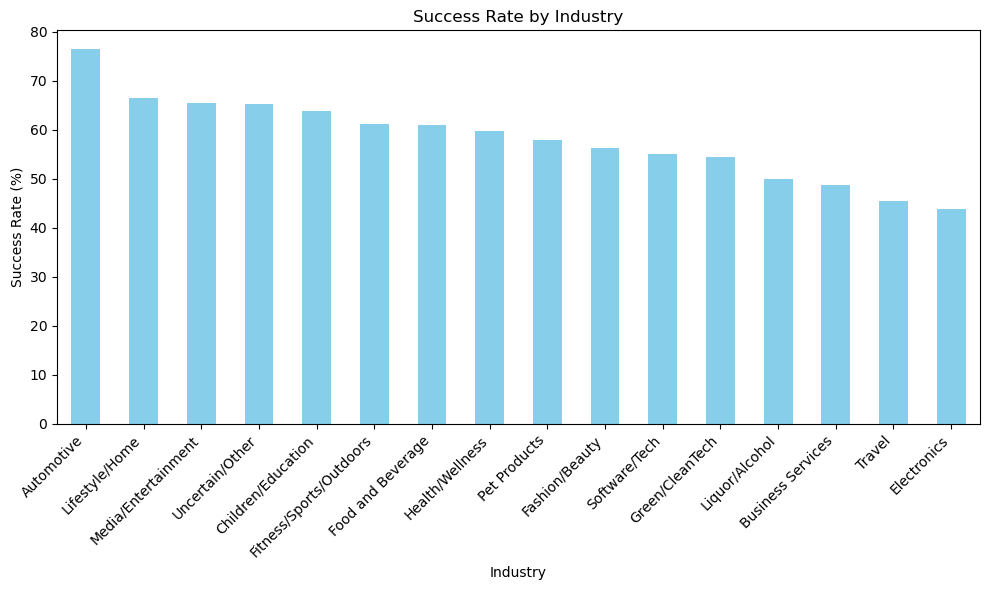

In [40]:
# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sorted_success_rate.plot(kind='bar', color='skyblue')
plt.title('Success Rate by Industry')
plt.xlabel('Industry')
plt.ylabel('Success Rate (%)')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

## 3. Model Development <a name="MDev"></a>

In [41]:
# Convert categorical data to numeric with `pd.get_dummies`
sharktank_df_dummies = pd.get_dummies(sharktank_df, dtype='int')
sharktank_df_dummies.head(10)

Season Number  Episode Number  Pitch Number Season Start Season End  \
0              1               1             1   2009-08-09 2010-02-05   
1              1               1             2   2009-08-09 2010-02-05   
2              1               1             3   2009-08-09 2010-02-05   
3              1               1             4   2009-08-09 2010-02-05   
4              1               1             5   2009-08-09 2010-02-05   
5              1               2             6   2009-08-09 2010-02-05   
6              1               2             7   2009-08-09 2010-02-05   
7              1               2             8   2009-08-09 2010-02-05   
8              1               2             9   2009-08-09 2010-02-05   
9              1               2            10   2009-08-09 2010-02-05   

  Original Air Date  Company Website  US Viewership  Original Ask Amount  \
0        2009-08-09                1           4.15                50000   
1        2009-08-09                1           4.15               460000   
2        2009-08-09                1           4.15              1200000   
3        2009-08-09                1           4.15               250000   
4        2009-08-09                0           4.15              1000000   
5        2009-08-16                1           5.59               500000   
6        2009-08-16                1           5.59               250000   
7        2009-08-16                0           5.59               500000   
8        2009-08-16                1           5.59               200000   
9        2009-08-16                0           5.59               100000   

   Original Offered Equity  Valuation Requested  Got Deal  Total Deal Amount  \
0                     15.0               333333         1            50000.0   
1                     10.0              4600000         1           460000.0   
2                     10.0             12000000         0                0.0   
3                     25.0              1000000         0                0.0   
4                     15.0              6666667         0                0.0   
5                     15.0              3333333         1           500000.0   
6                     10.0              2500000         1           250000.0   
7                     10.0              5000000         0                0.0   
8                     20.0              1000000         0                0.0   
9                     20.0               500000         0                0.0   

   Total Deal Equity  Deal Valuation  Number of Sharks in Deal  \
0               55.0         90909.0                       1.0   
1               50.0        920000.0                       2.0   
2                0.0             0.0                       0.0   
3                0.0             0.0                       0.0   
4                0.0             0.0                       0.0   
5               50.0       1000000.0                       2.0   
6              100.0        250000.0                       5.0   
7                0.0             0.0                       0.0   
8                0.0             0.0                       0.0   
9                0.0             0.0                       0.0   

   Investment Amount Per Shark  Equity Per Shark  Royalty Deal  \
0                      50000.0              55.0           0.0   
1                     230000.0              25.0           0.0   
2                          0.0               0.0           0.0   
3                          0.0               0.0           0.0   
4                          0.0               0.0           0.0   
5                     250000.0              25.0           0.0   
6                      50000.0              20.0           1.0   
7                          0.0               0.0           0.0   
8                          0.0               0.0           0.0   
9                          0.0               0.0           0.0   

   Barbara Corco

In [42]:
# Split our preprocessed data into our features and target arrays
y = sharktank_df_dummies['Got Deal']
X = sharktank_df_dummies.drop(columns = 'Got Deal')

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8)

In [43]:
# # Ways to deal with datetime columns

# # Extract relevant features from datetime columns
# X_train['Season Start Year'] = X_train['Season Start'].dt.year
# X_train['Season Start Month'] = X_train['Season Start'].dt.month
# X_train['Season End Year'] = X_train['Season End'].dt.year
# X_train['Season End Month'] = X_train['Season End'].dt.month
# X_train['Original Air Date Year'] = X_train['Original Air Date'].dt.year
# X_train['Original Air Date Month'] = X_train['Original Air Date'].dt.month

# # Drop original datetime columns
# X_train.drop(['Season Start', 'Season End', 'Original Air Date'], axis=1, inplace=True)


In [44]:
# Drop datetime columns
X_train.drop(['Season Start', 'Season End', 'Original Air Date'], axis=1, inplace=True)
X_test.drop(['Season Start', 'Season End', 'Original Air Date'], axis=1, inplace=True)

In [45]:
# # Create a StandardScaler instances
# scaler = StandardScaler()

# # Fit the StandardScaler
# X_scaler = scaler.fit(X_train)

# # Scale the data
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

In [46]:
# # Check datatype of X_train
# type(X_train)

### Compile, Train and Evaluate the Model

In [47]:
# # Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# number_input_features = X_train.shape[1]

# nn = tf.keras.models.Sequential()

# # First hidden layer
# nn.add(tf.keras.layers.Dense(units = 5, activation='relu', input_dim=number_input_features))

# # Second hidden layer
# nn.add(tf.keras.layers.Dense(units=10, activation='tanh'))

# # Third hidden layer
# nn.add(tf.keras.layers.Dense(units=10, activation='relu'))

# nn.add(tf.keras.layers.Dense(units=10, activation='tanh'))

# # Output layer
# nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# # Check the structure of the model
# nn.summary()

In [48]:
# # Compile the model
# nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [49]:
# # Train the model
# fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

In [50]:
# # Evaluate the model using the test data
# model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [51]:
# # Export our model to HDF5 file
# nn.save('my_model.h5')
# nn.save('my_model.keras')

In [52]:
columns_to_keep = ['Industry', 'Company Website', 'US Viewership', 'Original Ask Amount', 'Original Offered Equity', 'Pitchers Gender', 'Got Deal']

# Create a new DataFrame with selected columns
sharktank_df_limited = sharktank_df[columns_to_keep].copy()

In [53]:
sharktank_df_limited.head()

,Industry,Company Website,US Viewership,Original Ask Amount,Original Offered Equity,Pitchers Gender,Got Deal
0,Health/Wellness,1,4.15,50000,15.0,Female,1
1,Food and Beverage,1,4.15,460000,10.0,Male,1
2,Business Services,1,4.15,1200000,10.0,Male,0
3,Lifestyle/Home,1,4.15,250000,25.0,Male,0
4,Software/Tech,0,4.15,1000000,15.0,Male,0


In [54]:
# Determine the size of the dataframe
print("The sharktank_df_limited dataframe has {} rows and {} columns."\
      .format(sharktank_df_limited.shape[0], sharktank_df_limited.shape[1]))

The sharktank_df_limited dataframe has 1345 rows and 7 columns.


In [55]:
# Check for remaining missing values
print('The number of missing values in the dataset is:',sharktank_df.isnull().sum().sum())

The number of missing values in the dataset is: 0


In [56]:
# Convert categorical data to numeric with `pd.get_dummies`
sharktank_df_limited_dummies = pd.get_dummies(sharktank_df_limited, dtype='int')
sharktank_df_limited_dummies.head(10)

,Company Website,US Viewership,Original Ask Amount,Original Offered Equity,Got Deal,Industry_Automotive,Industry_Business Services,Industry_Children/Education,Industry_Electronics,Industry_Fashion/Beauty,Industry_Fitness/Sports/Outdoors,Industry_Food and Beverage,Industry_Green/CleanTech,Industry_Health/Wellness,Industry_Lifestyle/Home,Industry_Liquor/Alcohol,Industry_Media/Entertainment,Industry_Pet Products,Industry_Software/Tech,Industry_Travel,Industry_Uncertain/Other,Pitchers Gender_Female,Pitchers Gender_Male,Pitchers Gender_Mixed Team
0,1,4.15,50000,15.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,1,4.15,460000,10.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,1,4.15,1200000,10.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,4.15,250000,25.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,4.15,1000000,15.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
5,1,5.59,500000,15.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,1,5.59,250000,10.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,0,5.59,500000,10.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,1,5.59,200000,20.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,0,5.59,100000,20.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [57]:
# Split our preprocessed data into our features and target arrays
y = sharktank_df_limited_dummies['Got Deal']
X = sharktank_df_limited_dummies.drop(columns = 'Got Deal')

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8)

In [58]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [59]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = X_train.shape[1]

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = 5, activation='relu', input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation='tanh'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation='relu'))

nn.add(tf.keras.layers.Dense(units=10, activation='tanh'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

/Applications/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411 (1.61 KB)

 Trainable params: 411 (1.61 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5515 - loss: 0.6938
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6073 - loss: 0.6906
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6232 - loss: 0.6707
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6136 - loss: 0.6735
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6232 - loss: 0.6660
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6085 - loss: 0.6701 
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6163 - loss: 0.6680
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5726 - loss: 0.6820
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5948 - loss: 0.6720
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6119 - loss: 0.6649
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6182 - loss: 0.6594
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6016 - l

In [61]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

11/11 - 0s - 17ms/step - accuracy: 0.5905 - loss: 0.6749
Loss: 0.6748537421226501, Accuracy: 0.5905044674873352


In [62]:
# # Get the weights of the first layer
# first_layer_weights = nn.layers[0].get_weights()[0]

# # Transpose the weights to match the shape of X.columns
# first_layer_weights_transposed = np.transpose(first_layer_weights)

# # Convert the weights to a DataFrame for easier analysis
# weights_df = pd.DataFrame(first_layer_weights_transposed, columns=X.columns)

# # Print the weights of the first layer
# print(weights_df)

In [63]:
# # Provided coefficients data
# coefficients_data = {
#     'Feature': ['Company Website', 'US Viewership', 'Original Ask Amount', 'Original Offered Equity', 'Industry_Automotive',
#                 'Industry_Business Services', 'Industry_Children/Education', 'Industry_Electronics', 'Industry_Fashion/Beauty',
#                 'Industry_Fitness/Sports/Outdoors', 'Industry_Food and Beverage', 'Industry_Green/CleanTech',
#                 'Industry_Health/Wellness', 'Industry_Lifestyle/Home', 'Industry_Liquor/Alcohol', 'Industry_Media/Entertainment',
#                 'Industry_Pet Products', 'Industry_Software/Tech', 'Industry_Travel', 'Industry_Uncertain/Other',
#                 'Pitchers Gender_Female', 'Pitchers Gender_Male', 'Pitchers Gender_Mixed Team'],
#     'Coefficient': [-0.060627, -0.496006, -0.455664, 0.157047, 0.198923, -0.078399, 0.017454, -0.430522, 0.128394,
#                      0.236925, -0.060146, 0.265675, -0.295224, 0.445653, 0.094635, 0.381736, -0.442694, 0.118305, -0.057214,
#                      -0.136821, 0.254838, 0.251280, -0.327438]
# }

# # Create DataFrame from coefficients data
# coefficients_df = pd.DataFrame(coefficients_data)

# # Calculate the absolute values of coefficients
# coefficients_df['Absolute Coefficient'] = abs(coefficients_df['Coefficient'])

# # Sort DataFrame by absolute coefficient values
# sorted_coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# # Display the sorted DataFrame
# print(sorted_coefficients_df)


In [64]:
# # Run LinearRegression
# model = LinearRegression()
# model.fit(X, y)

# # Impact of each column
# coefficients = pd.Series(model.coef_, index=X.columns)
# print(coefficients)

# # Get the index of the coefficient with the largest absolute value
# max_coef_index = np.argmax(np.abs(model.coef_))

# max_coef_feature_name = X.columns[max_coef_index]

# print("The feature with the largest coefficient is:", max_coef_feature_name)
# print("The corresponding coefficient value is:", model.coef_[max_coef_index])

In [65]:
# # Predict probabilities
# predicted_probabilities = model.predict(X)

# # Apply threshold (e.g., 0.5)
# threshold = 0.5
# binary_predictions = (predicted_probabilities > threshold).astype(int)

# # Print binary predictions
# print(binary_predictions)

In [66]:
# # Initialize the scaler
# scaler = StandardScaler()

# # Fit and transform the scaler on the feature matrix X
# X_scaled = scaler.fit_transform(X)

# # Run Logistic Regression
# logistic_model = LogisticRegression()
# logistic_model.fit(X_scaled, y)

# # Coefficients of logistic regression model
# coefficients = pd.Series(logistic_model.coef_[0], index=X.columns)
# print(coefficients)

# # Get the index of the coefficient with the largest absolute value
# max_coef_index = np.argmax(np.abs(logistic_model.coef_))

# max_coef_feature_name = X.columns[max_coef_index]

# print("The feature with the largest coefficient is:", max_coef_feature_name)
# print("The corresponding coefficient value is:", logistic_model.coef_[0][max_coef_index])

In [67]:
# print(X.columns)

In [68]:
# X = X.drop(columns = ['Industry_Automotive',
#        'Industry_Business Services', 'Industry_Children/Education',
#        'Industry_Electronics', 'Industry_Fashion/Beauty',
#        'Industry_Fitness/Sports/Outdoors', 'Industry_Food and Beverage',
#        'Industry_Green/CleanTech', 'Industry_Health/Wellness',
#        'Industry_Lifestyle/Home', 'Industry_Liquor/Alcohol',
#        'Industry_Media/Entertainment', 'Industry_Pet Products',
#        'Industry_Software/Tech', 'Industry_Travel',
#        'Industry_Uncertain/Other'])

In [69]:
# model = LinearRegression()
# model.fit(X, y)

# coefficients = pd.Series(model.coef_, index=X.columns)
# print(coefficients)

# # Get the index of the coefficient with the largest absolute value
# max_coef_index = np.argmax(np.abs(model.coef_))

# # Assuming X is a DataFrame
# max_coef_feature_name = X.columns[max_coef_index]

# print("The feature with the largest coefficient is:", max_coef_feature_name)
# print("The corresponding coefficient value is:", model.coef_[max_coef_index])